In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving WeatherWise_Dataset.csv to WeatherWise_Dataset (1).csv


In [4]:
df = pd.read_csv('WeatherWise_Dataset.csv', encoding='latin-1')

In [5]:
df.head()

,Humidity (%),Temperature (°C),Wind Speed (km/h),Rainfall (mm),Advice
0,78.6,8.2,10.6,9.6,"It's a rainy day, go out with an umbrella. The..."
1,61.7,12.8,5.7,1.4,"Weather is moderate, have a good day! Monitor ..."
2,70.2,13.1,29.8,2.4,"Weather is moderate, have a good day! Monitor ..."
3,84.5,19.1,11.3,1.5,"It's a humid day, stay hydrated. High humidity..."
4,60.9,10.9,17.4,1.7,"Weather is moderate, have a good day! Monitor ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Humidity (%)       2000 non-null   float64
 1   Temperature (°C)   2000 non-null   float64
 2   Wind Speed (km/h)  2000 non-null   float64
 3   Rainfall (mm)      2000 non-null   float64
 4   Advice             2000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum()

,0
Humidity (%),0
Temperature (°C),0
Wind Speed (km/h),0
Rainfall (mm),0
Advice,0


In [8]:
df.describe()

,Humidity (%),Temperature (°C),Wind Speed (km/h),Rainfall (mm)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,74.763000,17.262150,17.529000,4.894400
std,8.576034,7.264001,7.218834,2.851044
min,60.000000,5.000000,5.000000,0.000000
25%,67.400000,10.900000,11.100000,2.400000
50%,74.650000,17.300000,17.600000,4.900000
75%,82.000000,23.700000,23.700000,7.300000
max,90.000000,30.000000,30.000000,10.000000


In [9]:
# Histogram

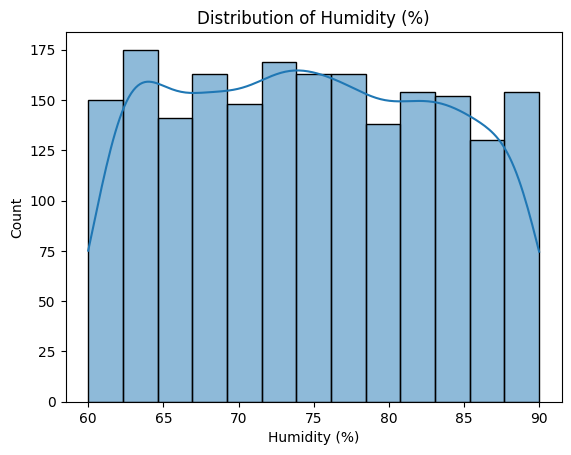

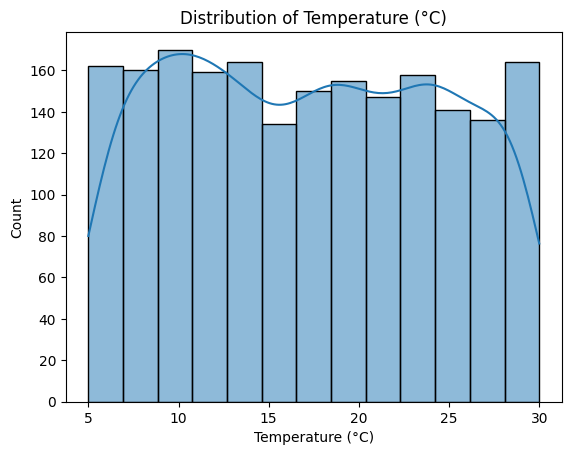

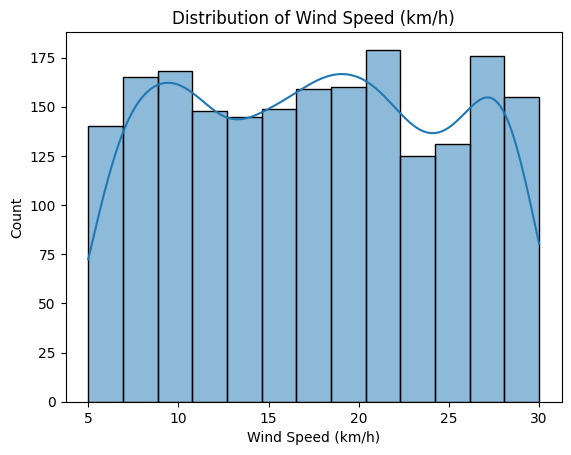

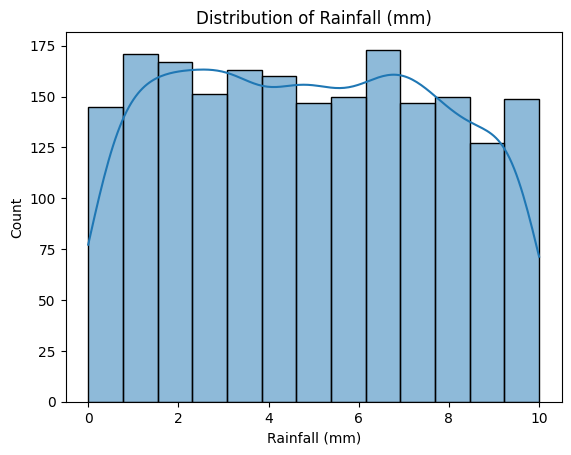

In [10]:
for col in ['Humidity (%)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)']:
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Humidity (%)       2000 non-null   float64
 1   Temperature (°C)   2000 non-null   float64
 2   Wind Speed (km/h)  2000 non-null   float64
 3   Rainfall (mm)      2000 non-null   float64
 4   Advice             2000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 78.2+ KB


In [12]:
# heatmap for correlation matrix

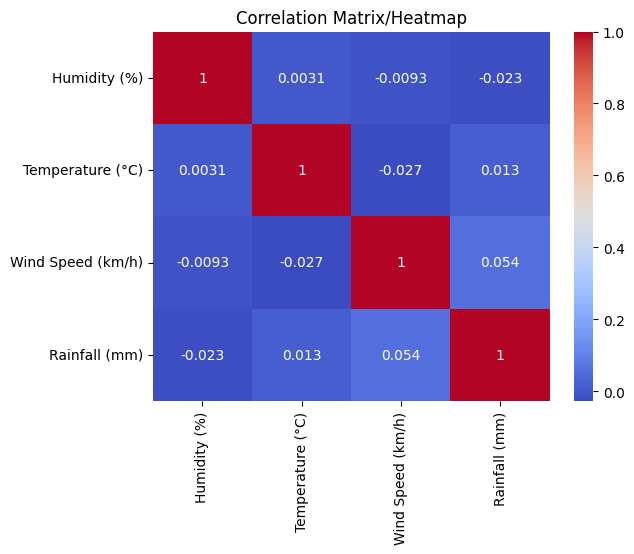

In [13]:
numeric_data = df.select_dtypes(include=['float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix/Heatmap")
plt.show()

In [14]:
# Relationship(boxplot) b/w features & advice

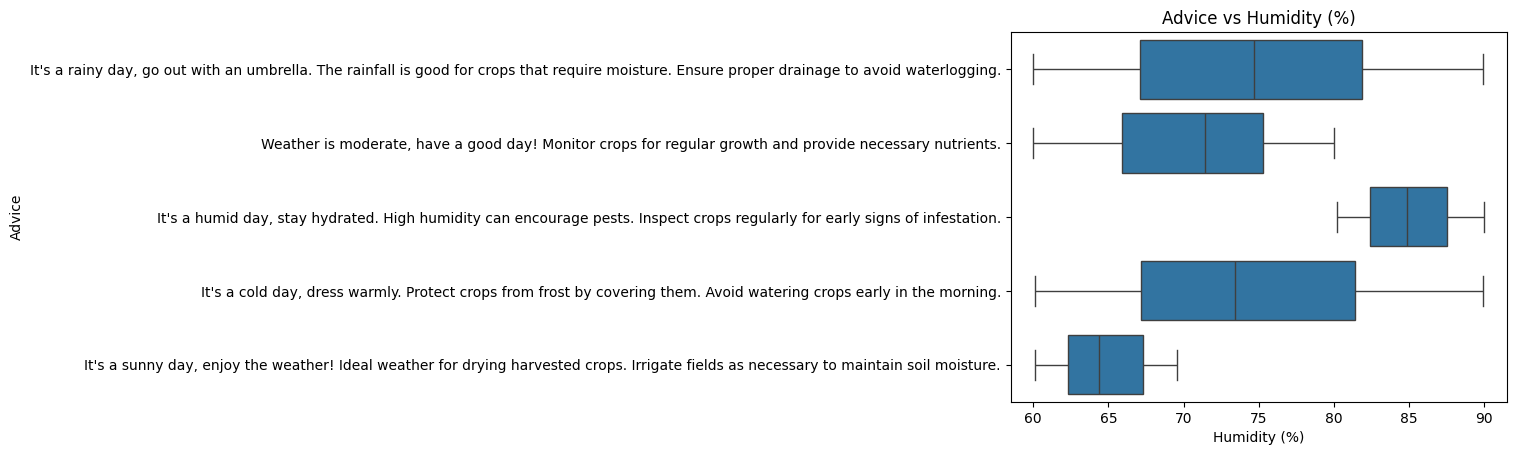

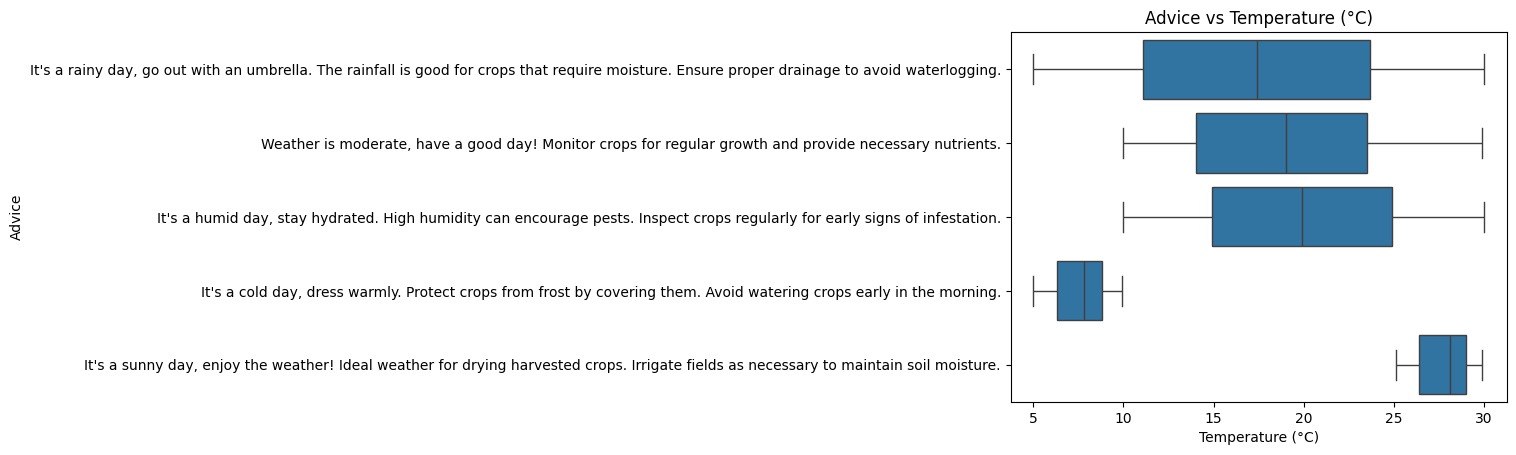

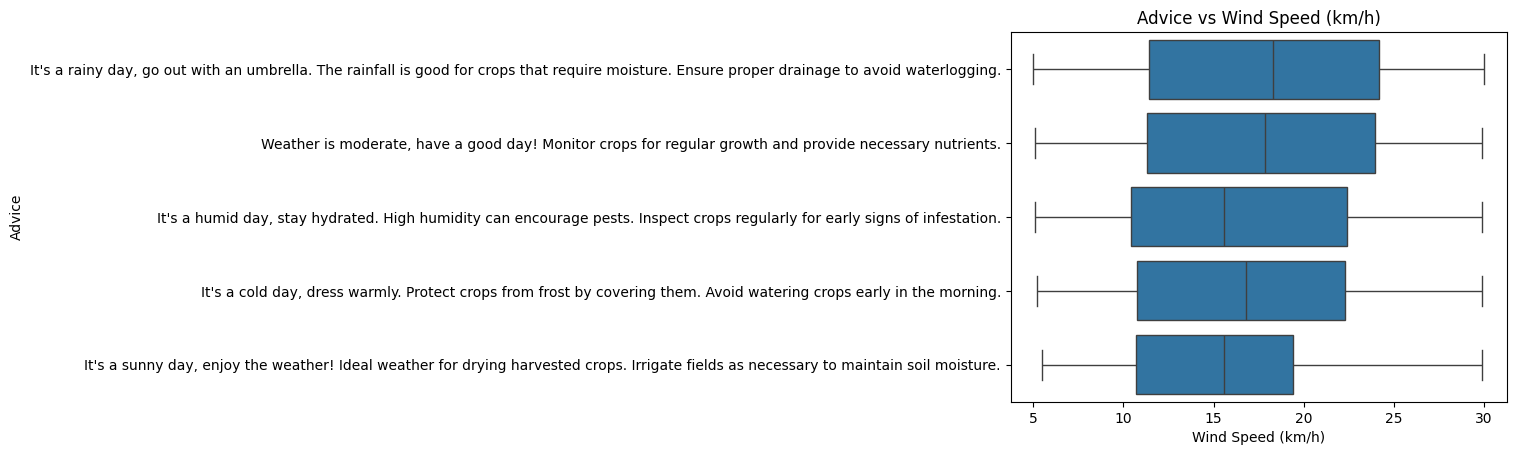

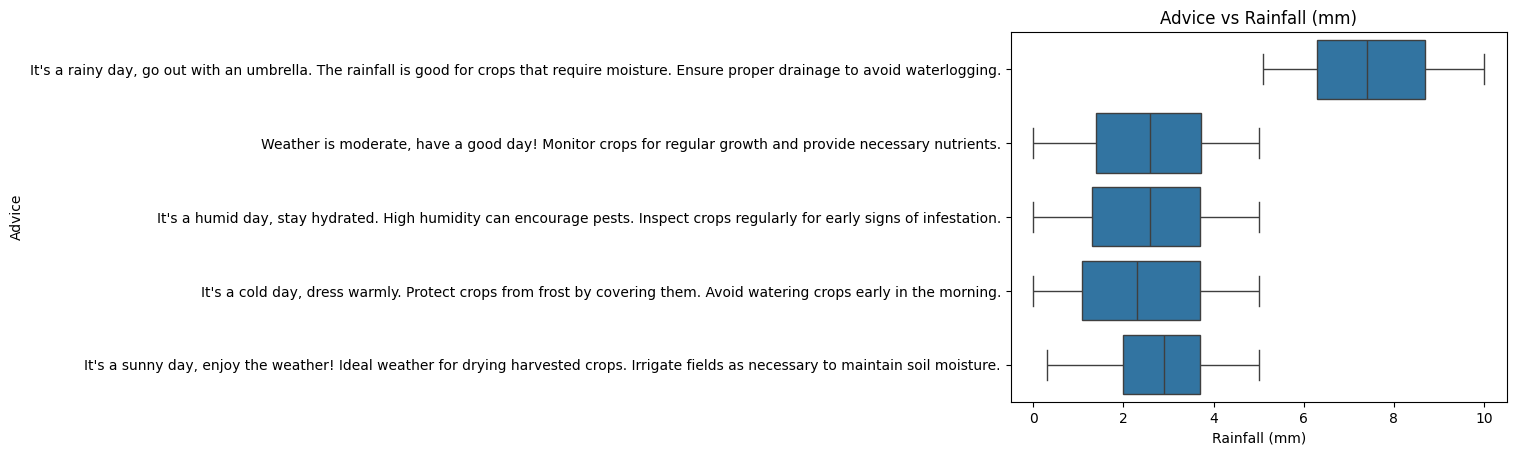

In [15]:
for col in ['Humidity (%)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)']:
  sns.boxplot(y='Advice', x=col, data=df)
  plt.title(f"Advice vs {col}")
  plt.show()

In [16]:
# countplot of advice

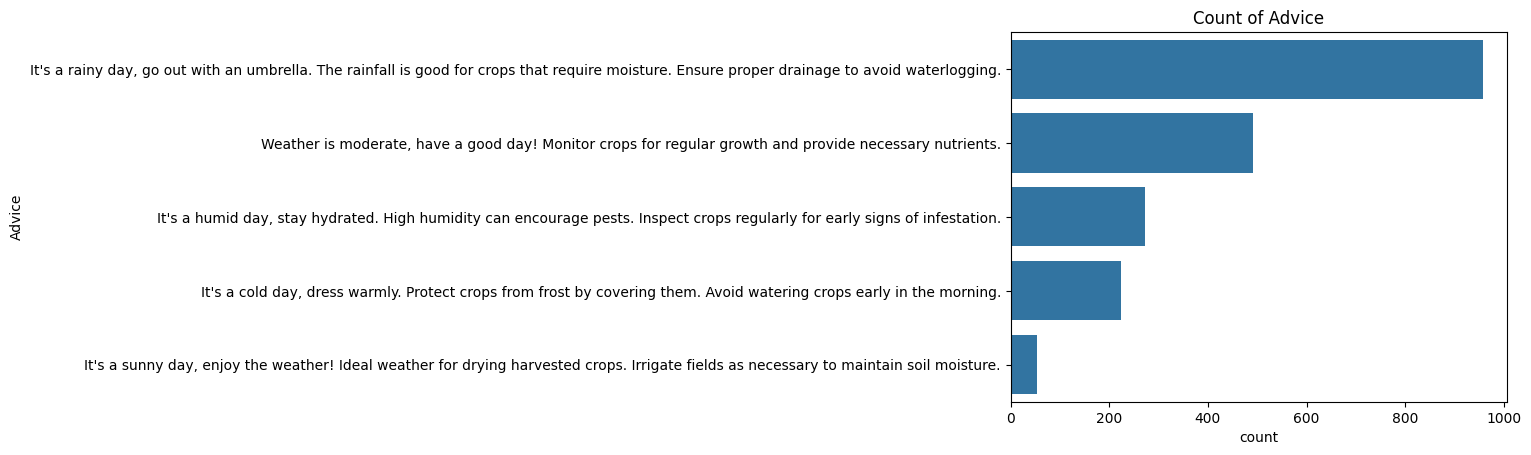

In [17]:
sns.countplot(y='Advice', data=df)
plt.title("Count of Advice")
plt.show()

In [18]:
# Encoding and concatination of Advice

In [19]:
encoder = OneHotEncoder()

In [20]:
# Encode advice
advice_encoded = encoder.fit_transform(df[['Advice']]).toarray()
advice_df = pd.DataFrame(advice_encoded, columns=encoder.get_feature_names_out(['Advice']))

In [21]:
# Concatination of advice
df_encoded = pd.concat([df.drop('Advice', axis=1), advice_df],axis=1)

In [22]:
df_encoded.head()

,Humidity (%),Temperature (°C),Wind Speed (km/h),Rainfall (mm),"Advice_It's a cold day, dress warmly. Protect crops from frost by covering them. Avoid watering crops early in the morning.","Advice_It's a humid day, stay hydrated. High humidity can encourage pests. Inspect crops regularly for early signs of infestation.","Advice_It's a rainy day, go out with an umbrella. The rainfall is good for crops that require moisture. Ensure proper drainage to avoid waterlogging.","Advice_It's a sunny day, enjoy the weather! Ideal weather for drying harvested crops. Irrigate fields as necessary to maintain soil moisture.","Advice_Weather is moderate, have a good day! Monitor crops for regular growth and provide necessary nutrients."
0,78.6,8.2,10.6,9.6,0.0,0.0,1.0,0.0,0.0
1,61.7,12.8,5.7,1.4,0.0,0.0,0.0,0.0,1.0
2,70.2,13.1,29.8,2.4,0.0,0.0,0.0,0.0,1.0
3,84.5,19.1,11.3,1.5,0.0,1.0,0.0,0.0,0.0
4,60.9,10.9,17.4,1.7,0.0,0.0,0.0,0.0,1.0


In [23]:
# splitting for model training/testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_encoded[['Humidity (%)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)']]
y = df_encoded.drop(['Humidity (%)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,Humidity (%),Temperature (°C),Wind Speed (km/h),Rainfall (mm)
968,60.6,8.0,17.1,6.6
240,78.2,26.2,21.2,4.7
819,64.7,5.5,15.5,8.1
692,81.9,23.1,22.2,0.5
420,76.6,23.4,14.1,4.3


In [28]:
y_train.head()

,"Advice_It's a cold day, dress warmly. Protect crops from frost by covering them. Avoid watering crops early in the morning.","Advice_It's a humid day, stay hydrated. High humidity can encourage pests. Inspect crops regularly for early signs of infestation.","Advice_It's a rainy day, go out with an umbrella. The rainfall is good for crops that require moisture. Ensure proper drainage to avoid waterlogging.","Advice_It's a sunny day, enjoy the weather! Ideal weather for drying harvested crops. Irrigate fields as necessary to maintain soil moisture.","Advice_Weather is moderate, have a good day! Monitor crops for regular growth and provide necessary nutrients."
968,0.0,0.0,1.0,0.0,0.0
240,0.0,0.0,0.0,0.0,1.0
819,0.0,0.0,1.0,0.0,0.0
692,0.0,1.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,1.0


In [29]:
# scaling the features

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled[:5]

array([[-1.62926224, -1.27911796, -0.05554095,  0.60976154],
       [ 0.42228691,  1.20369567,  0.51162687, -0.05815727],
       [-1.15134454, -1.62016379, -0.27687473,  1.13706586],
       [ 0.8535785 ,  0.78079885,  0.64996048, -1.53460938],
       [ 0.23578245,  0.82172435, -0.47054179, -0.19877176]])

In [33]:
# Training the model by knn

In [34]:
k = 7                                                   # we can adjust this value for better performance/pridiction
knn = KNeighborsClassifier(n_neighbors=k)               # initializaton

In [35]:
knn.fit(X_train_scaled, y_train)                        # train the model on training data
y_pred = knn.predict(X_test_scaled)                     # prediction on test data

In [36]:
# Evaluation of model
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.9225


In [37]:
print("\nClassification report:", classification_report(y_test, y_pred))


Classification report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.90      0.90      0.90        52
           2       0.97      0.97      0.97       200
           3       0.75      0.38      0.50         8
           4       0.92      0.90      0.91        89

   micro avg       0.94      0.92      0.93       400
   macro avg       0.89      0.81      0.83       400
weighted avg       0.93      0.92      0.93       400
 samples avg       0.92      0.92      0.92       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# creating a function to get advice

In [39]:
def get_advice(humidity, temperature, wind_speed, rainfall):
  input_data = pd.DataFrame(
        [[humidity, temperature, wind_speed, rainfall]],
        columns=['Humidity (%)', 'Temperature (°C)', 'Wind Speed (km/h)', 'Rainfall (mm)'])          # input data
  input_scaled = scaler.transform(input_data)                                     # input data is scaled
  prediction = knn.predict(input_scaled)                                          # prediction

  if len(prediction.shape) == 1:                                                  # Single label prediction
    advice_index = prediction[0]
  else:                                                                           # One-hot encoded prediction
    advice_index = np.argmax(prediction)                                          # get the index of predicted advice

  try:
    advice_text = encoder.categories_[0][advice_index]                            # This will be the advice
  except IndexError:
    print("Error: Advice index out of range.")
    advice_text = "Unknown advice. Check your data and model."

  return advice_text

In [40]:
# Example usage

In [41]:
import json as json
humidity = 78.2
temperature = 18.3
wind_speed = 21.1
rainfall = 3.1
predicted_advice = get_advice(humidity, temperature, wind_speed, rainfall)
print("Predicted Advice:", predicted_advice)
print(type(predicted_advice))

Predicted Advice: Weather is moderate, have a good day! Monitor crops for regular growth and provide necessary nutrients.
<class 'str'>


In [42]:
# Testing

In [43]:
test_cases = [
    [78.2, 18.3, 21.1, 3.1],
    [66.6, 12.4, 5, 7],
    [82.9, 5.7, 23.9, 9.4],
    [87.9, 27.2, 11.3, 2.5]
]

for case in test_cases:
  print(f"Input: {case}")
  print(f"Predicted Advice: {get_advice(*case)}")
  print("-------------------------------")

Input: [78.2, 18.3, 21.1, 3.1]
Predicted Advice: Weather is moderate, have a good day! Monitor crops for regular growth and provide necessary nutrients.
-------------------------------
Input: [66.6, 12.4, 5, 7]
Predicted Advice: It's a rainy day, go out with an umbrella. The rainfall is good for crops that require moisture. Ensure proper drainage to avoid waterlogging.
-------------------------------
Input: [82.9, 5.7, 23.9, 9.4]
Predicted Advice: It's a rainy day, go out with an umbrella. The rainfall is good for crops that require moisture. Ensure proper drainage to avoid waterlogging.
-------------------------------
Input: [87.9, 27.2, 11.3, 2.5]
Predicted Advice: It's a humid day, stay hydrated. High humidity can encourage pests. Inspect crops regularly for early signs of infestation.
-------------------------------


In [44]:
import pickle

# save model,scaler & encoder
with open('knn_model.pkl', 'wb') as model_file:
  pickle.dump(knn, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)
with open('encoder.pkl', 'wb') as encoder_file:
  pickle.dump(encoder, encoder_file)

In [45]:
# load these objects

In [46]:
with open('knn_model.pkl', 'rb') as model_file:
  knn_loaded = pickle.load(model_file)
with open('scaler.pkl', 'rb') as model_file:
  scaler_loaded = pickle.load(model_file)
with open('encoder.pkl', 'rb') as model_file:
  encoded_loader = pickle.load(model_file)

In [47]:
# from google.colab import files
# files.download('knn_model.pkl')
# files.download('scaler.pkl')
# files.download('encoder.pkl')

In [48]:
!pip install pyngrok

In [49]:
from pyngrok import ngrok, conf

# print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = '2oQp2VUXGtWILvfWSAlmYXLZxNo_47R1erFFXMmnvJAQbs33H'

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

port = "5000"

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url

# GET route for server status check
@app.route('/', methods=['GET'])
def home():
    return jsonify({"msg": "Server is live"})

# POST route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    humidity = data['humidity']
    temperature = data['temperature']
    wind_speed = data['wind_speed']
    rainfall = data['rainfall']

    advice_text = get_advice(humidity, temperature, wind_speed, rainfall)
    print(advice_text)

    return jsonify({'Advice': advice_text})

if __name__ == '__main__':
    try:
      public_url = ngrok.connect(port).public_url
      print(public_url)
      app.run(port=port)
    finally:
      ngrok.disconnect(public_url)


 * ngrok tunnel "https://5301-34-16-184-0.ngrok-free.app" -> "http://127.0.0.1:5000"
https://0e7c-34-16-184-0.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
